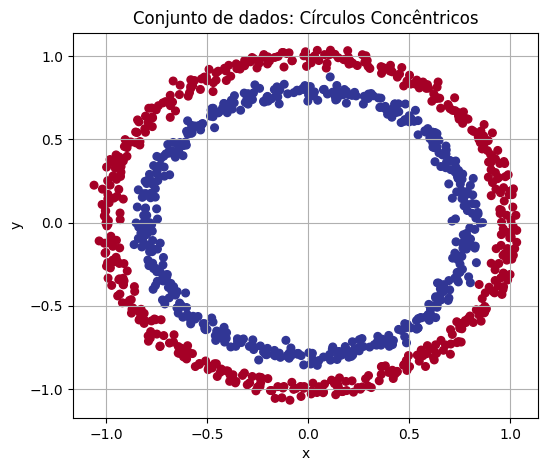

In [ ]:
# Importa√ß√µes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Gerar o dataset com c√≠rculos conc√™ntricos
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% de dados de teste

# Visualizar os dados
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=30)
plt.title("Conjunto de dados: C√≠rculos Conc√™ntricos")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [16]:
# Modelo com fun√ß√£o de ativa√ß√£o tanh
mlp_tanh = MLPClassifier(hidden_layer_sizes=(20,20), activation='tanh', max_iter=250, random_state=42) #j√° usa softmax impl√≠cita

# Treinar o modelo
mlp_tanh.fit(X_train, y_train)

# Avalia√ß√£o
y_pred_tanh = mlp_tanh.predict(X_test) # Previs√£o no conjunto de teste
acc_tanh = accuracy_score(y_test, y_pred_tanh)
print(f"Acur√°cia com ativa√ß√£o 'tanh': {acc_tanh:.3f}")


Acur√°cia com ativa√ß√£o 'tanh': 0.993


c:\Users\ryanq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


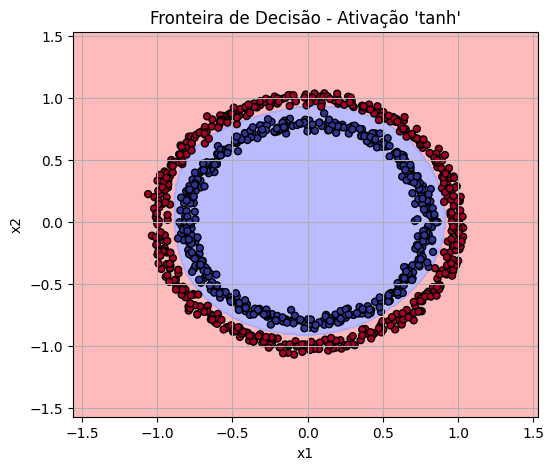

In [18]:
# Fun√ß√£o auxiliar para plotar a fronteira de decis√£o
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # classifica cada ponto da malha
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8) # desenha a regi√£o de decis√£o do modelo (cores diferentes)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=25, edgecolor='k') # plota os pontos reais do dataset por cima
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

# üñºÔ∏è Fronteira com ativa√ß√£o tanh
plot_decision_boundary(mlp_tanh, X, y, "Fronteira de Decis√£o - Ativa√ß√£o 'tanh'")


Acur√°cia com ativa√ß√£o 'identity' (linear): 0.527


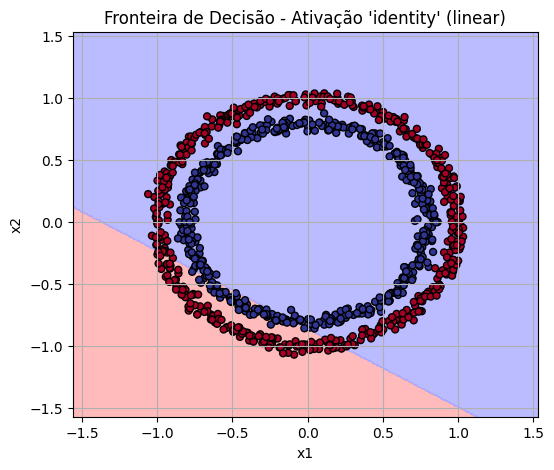

In [19]:
# Modelo com ativa√ß√£o linear (identity)
mlp_identity = MLPClassifier(hidden_layer_sizes=(20,20), activation='identity', max_iter=250, random_state=42)

# Treinar o modelo
mlp_identity.fit(X_train, y_train)

# Avalia√ß√£o
y_pred_identity = mlp_identity.predict(X_test)
acc_identity = accuracy_score(y_test, y_pred_identity)
print(f"Acur√°cia com ativa√ß√£o 'identity' (linear): {acc_identity:.3f}")

# Fronteira com ativa√ß√£o identity
plot_decision_boundary(mlp_identity, X, y, "Fronteira de Decis√£o - Ativa√ß√£o 'identity' (linear)")



In [5]:
from IPython.display import Markdown as md

md("""
### (a) Compara√ß√£o das Fronteiras

- Com ativa√ß√£o `tanh`: a rede neural consegue separar bem os dois c√≠rculos, formando uma fronteira curva e ajustada ao padr√£o n√£o linear dos dados.
- Com ativa√ß√£o `identity`: a rede n√£o consegue formar uma fronteira n√£o linear, e a separa√ß√£o fica muito ruim ‚Äî o modelo falha em capturar a estrutura circular dos dados.

### (b) Explica√ß√£o da Influ√™ncia da N√£o Linearidade

A aus√™ncia de fun√ß√µes de ativa√ß√£o n√£o lineares (uso de `identity`) impede que a RNA capture rela√ß√µes complexas nos dados. A fronteira de decis√£o resultante √© linear e inadequada para problemas n√£o lineares, como o dos c√≠rculos conc√™ntricos.

Isso leva ao **underfitting**, onde o modelo √© incapaz de aprender o padr√£o mesmo nos dados de treino. Ou seja, a capacidade da RNA √© limitada pela falta de n√£o linearidade.
""")



### (a) Compara√ß√£o das Fronteiras

- Com ativa√ß√£o `tanh`: a rede neural consegue separar bem os dois c√≠rculos, formando uma fronteira curva e ajustada ao padr√£o n√£o linear dos dados.
- Com ativa√ß√£o `identity`: a rede n√£o consegue formar uma fronteira n√£o linear, e a separa√ß√£o fica muito ruim ‚Äî o modelo falha em capturar a estrutura circular dos dados.

### (b) Explica√ß√£o da Influ√™ncia da N√£o Linearidade

A aus√™ncia de fun√ß√µes de ativa√ß√£o n√£o lineares (uso de `identity`) impede que a RNA capture rela√ß√µes complexas nos dados. A fronteira de decis√£o resultante √© linear e inadequada para problemas n√£o lineares, como o dos c√≠rculos conc√™ntricos.

Isso leva ao **underfitting**, onde o modelo √© incapaz de aprender o padr√£o mesmo nos dados de treino. Ou seja, a capacidade da RNA √© limitada pela falta de n√£o linearidade.
